In [188]:
import os
import numpy as np
import os.path as osp
from glob import glob
import pandas as pd
from umap import UMAP
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.impute import KNNImputer
from sklearn.utils import shuffle

In [177]:
# import numpy as np
# 
# # Assuming X_scaled is your scaled data
# def generate_noisy_data(X, num_new_points, noise_min=0.01, noise_max=0.2, y=None):
#     # Get the number of original data points and features
#     num_original_points, num_features = X.shape
#     
#     # Create an empty array for the new data
#     new_data = np.empty((num_new_points, num_features))
#     labels_data = []
#     # Generate new data points by adding noise to random samples from the original data
#     for i in range(num_new_points):
#         # Randomly pick a row from X_scaled
#         random_idx = np.random.choice(len(X), replace=True)
#         selected_row = X.iloc[random_idx]
#         if y is not None:
#             labels = y.iloc[random_idx] 
#         
#         # Generate noise and add it to the selected row
#         noise_factor = np.random.uniform(noise_min, noise_max)
#         noise = np.random.normal(loc=0.0, scale=noise_factor, size=num_features)
#         new_data[i] = selected_row + noise
#         labels_data.append(labels)
#     return new_data, labels_data
# 
# def remove_question_marks(df):
#     return df.applymap(lambda x: '' if x == '?' else float(str(x).replace('?', '')))
# 
# def unstack_dataframe(df, chunk_size):
#     # Extract feature columns and label column
#     feature_columns = [col for col in df.columns if col not in ['Frame', 'Label']]
#     
#     # Group by chunk and unstack features
#     df_unstacked = (df
#                      .groupby(df.index // chunk_size)
#                      .apply(lambda x: pd.Series(x[feature_columns].values.flatten(), 
#                                                 index=[f'{col}_{i+1}' for col in feature_columns for i in range(chunk_size)]))
#                      .reset_index(drop=True))
#     
#     # Add the label column without duplication
#     df_unstacked['Label'] = df.groupby(df.index // chunk_size)['Label'].first().values
#     
#     return df_unstacked

In [189]:
# path_to_data_folder = osp.join(r'D:\QuantifyingBehavior\dlc data')
path_to_data_folder = osp.join(r'D:\QuantifyingBehavior\electro_data')
all_files = glob(osp.join(path_to_data_folder, '*.csv'))
all_files
 

['D:\\QuantifyingBehavior\\electro_data\\all_data_chamber_long.csv',
 'D:\\QuantifyingBehavior\\electro_data\\electrophysiology_data.csv',
 'D:\\QuantifyingBehavior\\electro_data\\imputed_embedded_data.csv']

In [190]:
# df_list = []
# for file in all_files:
#     df_temp = pd.read_csv(file)
#     df_list.append(df_temp)
# df = pd.concat(df_list)

df_raw = pd.read_csv(all_files[0])
df = pd.read_csv(all_files[2])
#

In [181]:
# df_data = pd.read_csv(all_files[0])
# df_annotated = pd.read_csv(all_files[1])
# df_machine = pd.read_csv(all_files[2])

In [182]:
# print(len(df_data))
# print(len(df_annotated))
# print(len(df_machine))

In [196]:
features = [a for a in df.columns if (a.startswith('lfp_') or a.startswith('coherence_') or a.startswith('spike_'))&('imputed' in a) ]
features_now_imputed = [a.replace('_imputed','') for a in features]
label = 'sociability'

In [197]:
set(features_now_imputed) - set(df_raw.columns)

set()

In [198]:
df = df_raw[features_now_imputed+[label]]

In [199]:
df

,lfp_MeA_30-80Hz_2-during,coherence_MePV-MeD_30-80Hz_3-after,lfp_CeA_30-80Hz_4-change-during,lfp_STIA_12-30Hz_4-change-during,coherence_STIA-CeA_12-30Hz_4-change-during,coherence_CeA-MeD_30-80Hz_5-change-after,coherence_CeA-AA_30-80Hz_5-change-after,coherence_CeA-MeD_30-80Hz_1-before,sociability
0,NaN,NaN,2.4514,1.7362,-0.089253,NaN,NaN,NaN,affiliative
1,NaN,NaN,0.7297,2.0989,-0.189602,NaN,NaN,NaN,affiliative
2,3.5951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,affiliative
3,1.6739,NaN,NaN,NaN,NaN,NaN,NaN,NaN,aversive
4,8.5885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,affiliative
...,...,...,...,...,...,...,...,...,...
57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,affiliative
58,11.1887,0.230496,1.1680,NaN,NaN,0.002325,-0.211021,0.619361,affiliative
59,11.2898,0.236296,0.5427,NaN,NaN,-0.025925,-0.036946,0.618007,affiliative
60,4.7430,0.215044,NaN,NaN,NaN,NaN,NaN,NaN,affiliative


In [150]:
# df = pd.read_csv(all_files[0], index_col=0)
# df_class = df[df.columns[-1]]
# df = remove_question_marks(df[df.columns[:-1]])
# df['class'] = df_class
# df = df.dropna()

In [151]:
# # Define the chunk size
# chunk_size = 150
# 
# # Add a 'Chunk' column to facilitate grouping
# df['Chunk'] = df.index // chunk_size
# 
# # Function to create general aggregation dictionary
# def create_aggregation_dict(df):
#     aggregations = {}
#     for col in df.columns:
#         if col == 'Chunk':
#             continue  # Skip the chunk column
#         
#         if pd.api.types.is_numeric_dtype(df[col]):
#             # For numeric columns, use mean and standard deviation
#             aggregations[col] = ['mean', 'std']
#         else:
#             # For non-numeric columns, use the first value
#             aggregations[col] = 'first'
#     
#     return aggregations
# 
# # Create the general aggregation dictionary
# aggregations = create_aggregation_dict(df)
# 
# # Aggregate features for each chunk
# def aggregate_features(df, chunk_size):
#     # Apply aggregation functions
#     df_aggregated = df.groupby('Chunk').agg(aggregations)
#     
#     # Flatten MultiIndex columns if present
#     df_aggregated.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in df_aggregated.columns.values]
#     
#     # Reset index to get 'Chunk' as a column
#     df_aggregated.reset_index(drop=True, inplace=True)
#     
#     return df_aggregated
# 
# # Apply the aggregation function
# df_reduced = aggregate_features(df, chunk_size)

In [152]:
# male_cols = [a for a in df.columns if a.startswith('M_')]
# df_male = df[male_cols]
# X_cols = [a for a in male_cols if a.startswith('M_X')]
# Y_cols = [a for a in male_cols if a.startswith('M_Y')]
# cols = []
# only_x_y = []
# place_holders = []
# for x, y in zip(X_cols, Y_cols):
#     cols.append(x)
#     cols.append(y)
#     only_x_y.append(x)
#     only_x_y.append(y)
#     place_holder_p = x.replace('M_X', 'M_P')
#     place_holders.append(place_holder_p)
#     cols.append(place_holder_p)
# 
# df[place_holders] = 1
# # df[cols]
# 
# 


In [153]:
# # import pandas as pd
# # import numpy as np
# # 
# def reduce_chunk(chunk, window_size, overlap):
#     # Apply rolling window average with overlap
#     reduced_chunk = chunk.rolling(window=window_size, min_periods=1).mean()
# 
#     # Downsample by selecting every step_size row
#     step_size = window_size - overlap
#     return reduced_chunk.iloc[::step_size].reset_index(drop=True)
# # 
# # # Function to reduce the number of rows by applying rolling average to df and reduce y
# def reduce_rows_with_overlap(df, y, chunk_size, window_size, overlap):
#     # Split the DataFrame and y into chunks of size chunk_size
#     chunks = [df.iloc[i:i + chunk_size] for i in range(0, len(df), chunk_size)]
#     y_chunks = [y[i:i + chunk_size] for i in range(0, len(y), chunk_size)]
# 
#     # Apply rolling average and downsampling to each chunk
#     reduced_chunks = [reduce_chunk(chunk, window_size, overlap) for chunk in chunks]
# 
#     # Downsample y by taking the first value of each downsampled window
#     step_size = window_size - overlap
#     reduced_y_chunks = [pd.Series(y_chunk).iloc[::step_size].reset_index(drop=True) for y_chunk in y_chunks]
# 
#     # Concatenate reduced chunks into a single DataFrame and y array
#     reduced_df = pd.concat(reduced_chunks, ignore_index=True)
#     reduced_y = pd.concat(reduced_y_chunks, ignore_index=True)
# 
#     return reduced_df, reduced_y
# # 
# # # Apply the function to reduce rows in the DataFrame and reduce y
# # 
# # 
# # # Define parameters
# chunk_size = 150   # Each chunk has 150 rows
# window_size = 50   # Size of the moving window
# overlap = 10        # Amount of overlap between windows
# # 
# df_in = df.drop(columns=['Class','Timestamp'])
# # 
# df_reduced, y_reduced = reduce_rows_with_overlap(df_in, y, chunk_size, window_size, overlap)
# # 
# # # Show the reduced DataFrame
# # 


In [154]:
# len(df_reduced)

In [155]:
# df[cols].to_csv('supervised_data_male.csv')

In [156]:
# vars = [a for a in df_machine.columns if a.endswith('_y') or a.endswith('_x') or a.endswith('_p') ]
# df_male_x_y = df[only_x_y]

In [157]:
# X = df_machine[vars]
# X = df_machine[df_machine.columns[48:-4]].copy()
# y = df_machine[df_machine.columns[-4:]].copy()

In [158]:

# conditions = [
#     (y['Attack'] == 0) & (y['Sniffing'] == 0),  # Both are 0
#     (y['Attack'] == 1) & (y['Sniffing'] == 1),  # Both are 1
#     (y['Attack'] == 1) & (y['Sniffing'] == 0),  # Attack is 1, Sniff is 0
#     (y['Attack'] == 0) & (y['Sniffing'] == 1)   # Attack is 0, Sniff is 1
# ]
# 
# choices = ['bg', 'both', 'Attack', 'Attack']
# 
# y['label'] = np.select(conditions, choices)
# y = y['label']

In [159]:
# df_machine.columns

In [161]:
X = df[features] 
X = X.rename(columns={a:a.replace('_imputed','') for a in features})
y = df[label]

In [99]:
# Example usage:
# num_new_points = 3000  # How many new data points you want to generate
# noise_min=0.1, 
# noise_max=0.8   # Adjust the level of noise if needed
# new_data_points, labels = generate_noisy_data(X, num_new_points, noise_min=noise_min, noise_max=noise_max, y=y)
# 
# # Combine original and new data
# X_augmented = np.vstack((X, new_data_points))
# new_y = pd.concat([y, pd.Series(labels)], axis=0).reset_index(drop=True)
# print(f"Original data shape: {X.shape}")
# print(f"New data shape: {new_data_points.shape}")
# print(f"Augmented data shape: {X_augmented}")


In [162]:
# X_numeric = X.apply(pd.to_numeric, errors='coerce')
# 
# rows_with_nan = X_numeric.isna().any(axis=1)
# X_cleaned = X_numeric.loc[~rows_with_nan]
# y = y.loc[~rows_with_nan]
X_imputed = KNNImputer().fit_transform(X)
X_scaled = StandardScaler().fit_transform(X_imputed)
# X_scaled_shuffled = shuffle(X_scaled)
kmeans = KMeans(n_clusters=2)
kmeans_labels = kmeans.fit_predict(X_scaled)

# agglomerative = AgglomerativeClustering(n_clusters=2)
# agglomerative_labels = agglomerative.fit_predict(X_scaled)

In [175]:
temp_df = X
temp_df['class'] = y
temp_df.to_csv(osp.join(path_to_data_folder, 'electrophysiology_data.csv'))

# print(y.shape)
# print(X.shape)
# print(X_cleaned.shape)

In [164]:
reducer_tsne = TSNE(n_components=2, perplexity=5, init='pca', learning_rate='auto')
embedding_tsne = reducer_tsne.fit_transform(X_scaled)

C:\Users\user\anaconda3\envs\VAME\lib\site-packages\sklearn\manifold\_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


In [165]:
reducer_umap = UMAP(n_components=2, min_dist=0.0, n_neighbors=5)
embedding_umap = reducer_umap.fit_transform(X_scaled)

In [166]:
reducer_pca = PCA(n_components=2)
embedding_pca = reducer_pca.fit_transform(X_scaled)

In [167]:
df_data = pd.DataFrame(X_scaled)
# df_data['y'] = new_y.values
df_data['y'] = y.values
df_data[['umap1','umap2']] = embedding_umap

df_data[['pca1','pca2']] = embedding_pca
df_data[['tsne1','tsne2']] = embedding_tsne
df_data['kmeans'] = kmeans_labels
# df_data['agglomerative_labels']= agglomerative_labels

<AxesSubplot:xlabel='umap1', ylabel='umap2'>

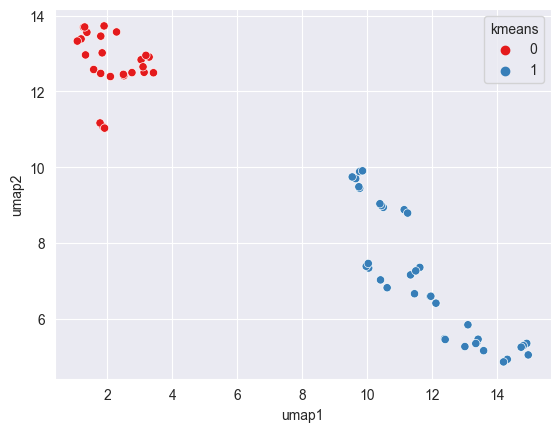

In [168]:
sns.scatterplot(x='umap1', y='umap2', data=df_data, hue='kmeans', palette='Set1')

<AxesSubplot:xlabel='pca1', ylabel='pca2'>

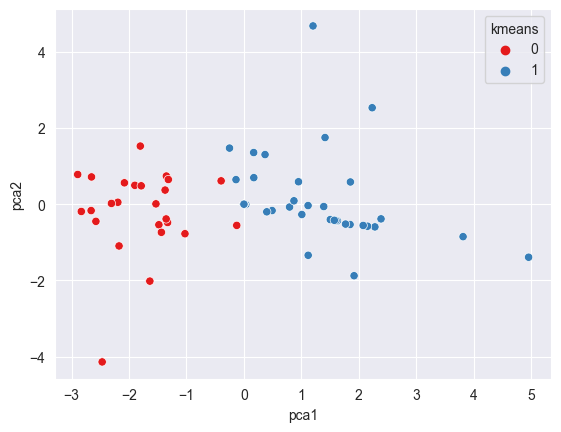

In [169]:
sns.scatterplot(x='pca1', y='pca2', data=df_data, hue='kmeans', palette='Set1')


<AxesSubplot:xlabel='tsne1', ylabel='tsne2'>

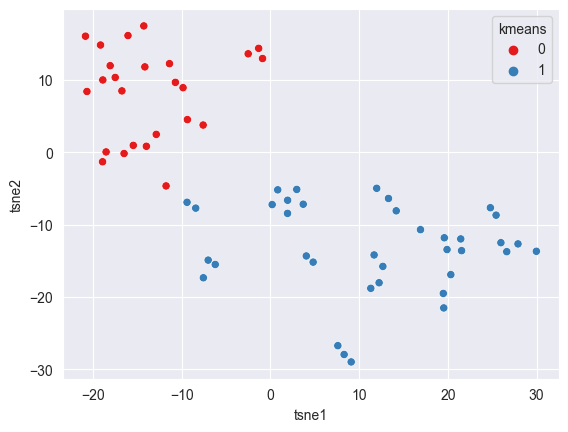

In [170]:
sns.scatterplot(x='tsne1', y='tsne2', data=df_data, hue='kmeans', palette='Set1')


<AxesSubplot:xlabel='umap1', ylabel='umap2'>

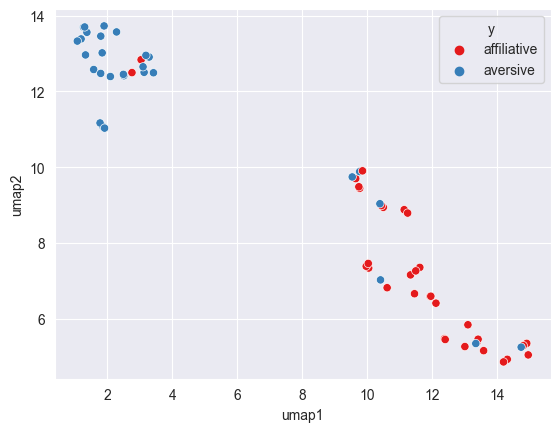

In [171]:
sns.scatterplot(x='umap1', y='umap2', data=df_data, hue='y', palette='Set1')

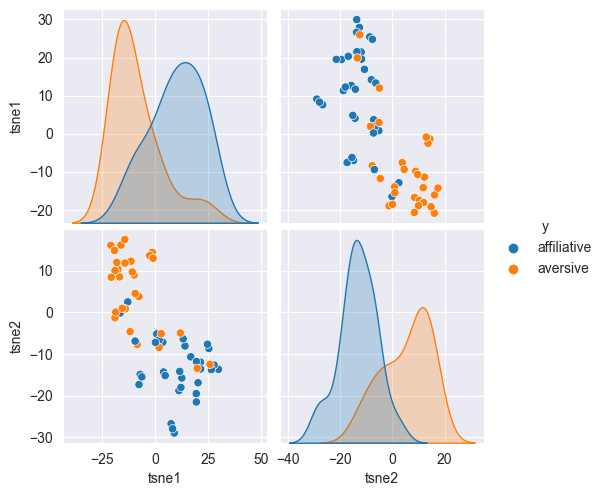

In [172]:
sns.pairplot(df_data,vars=['tsne1','tsne2'],  hue='y')

<AxesSubplot:xlabel='pca1', ylabel='pca2'>

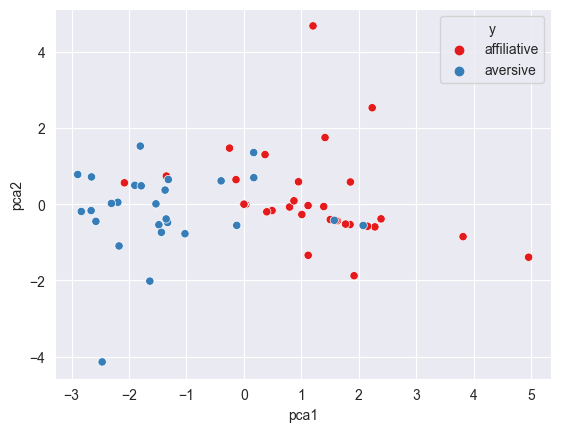

In [173]:
sns.scatterplot(x='pca1', y='pca2', data=df_data, hue='y', palette='Set1')


<AxesSubplot:xlabel='tsne1', ylabel='tsne2'>

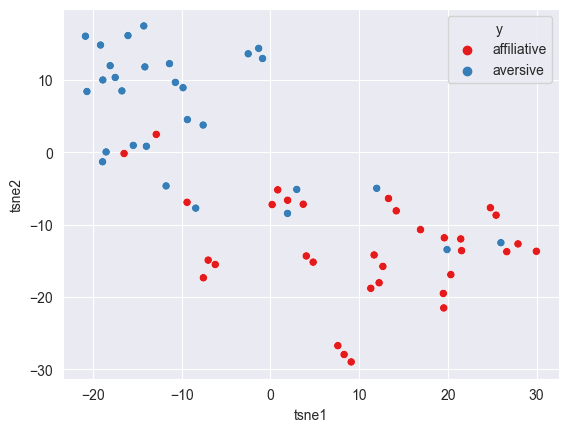

In [174]:
sns.scatterplot(x='tsne1', y='tsne2', data=df_data, hue='y', palette='Set1')
